In [1]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def load_surf_swarm(fdir,step,KL):
    fname = fdir+"surfaceSwarm"+str(step).zfill(4)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]*KL
    ycoord = fdata[:,1]*KL
    return xcoord,ycoord

def load_depth(fdir,maxstep,KL):
    depth_l = []
    depth_r = []
    for step in range(1,maxstep+1):
        xcoord,ycoord = load_surf_swarm(fdir,step,KL)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

In [3]:
eta_st = 1e18
eta_ch = 1e20
L =  500
h_st = 100 

C_isost = 3/16/np.pi**3*(L/h_st)**3*eta_st/eta_ch
print(C_isost)

0.007558953382781132


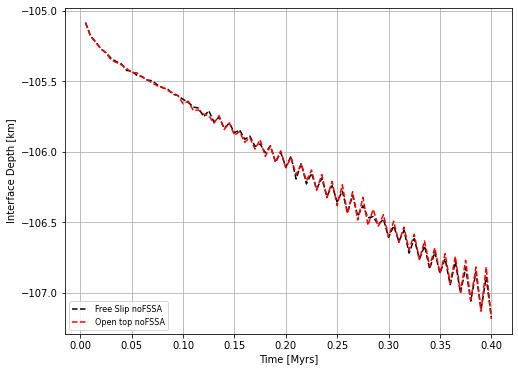

In [7]:
maxstep = 80
dt = 5 #kyrs
DT_str = "5.0"
KL = 500

#fdir0 = "Kaus2010_FSwithFSSA_air_"+DT_str+"ka/"
fdir1 = "Kaus2010_FSnoFSSA_air_"+DT_str+"ka/"
#fdir2 = "Kaus2010_OPwithFSSA_air_"+DT_str+"ka/"
fdir3 = "Kaus2010_OPnoFSSA_air_"+DT_str+"ka/"

times = np.arange(dt,dt*maxstep+1,dt)

#depth0_l,depth0_r= load_depth(fdir0,maxstep,KL)
depth1_l,depth1_r= load_depth(fdir1,maxstep,KL)
#depth2_l,depth2_r= load_depth(fdir2,maxstep,KL)
depth3_l,depth3_r= load_depth(fdir3,maxstep,KL)
    
fname = "Depth of the interface at x=−250km" #  and x=250km versus time"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)


#ax.plot(times/1000,depth0_l,'k',label= "Free Slip withFSSA")

ax.plot(times/1000,depth1_l,'--k',label= "Free Slip noFSSA")

#ax.plot(times/1000,depth2_l,'r',label= "Open top withFSSA")

ax.plot(times/1000,depth3_l,'--r',label= "Open top noFSSA")


#ax.set_xlim([0,2800])
ax.grid()
plt.legend(loc = 'lower left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')

In [ ]:
fname = "Comparison of the evolution of rms velocity"
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set(xlabel='Time [Myrs]', ylabel='$V_{rms}$ [meter/year]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)

#data0 = np.loadtxt(fdir0+"data_time_vrms.txt", unpack=True)
data1 = np.loadtxt(fdir1+"data_time_vrms.txt", unpack=True)
#data2 = np.loadtxt(fdir2+"data_time_vrms.txt", unpack=True)
data3 = np.loadtxt(fdir3+"data_time_vrms.txt", unpack=True)

#ax.plot(data0[0]/1000,data0[1],'k',label= "Free Slip withFSSA")
ax.plot(data1[0]/1000,data1[1],'--k',label= "Free Slip noFSSA")
#ax.plot(data2[0]/1000,data2[1],'r',label= "Open top withFSSA")
ax.plot(data3[0]/1000,data3[1],'--r',label= "Open top noFSSA")

# maxIndex = np.argmax(data[1])
# print('case1: ')
# print('    t(max vrms) = {0:.2f}'.format(data[0][maxIndex]))
# print('           vrms = {0:.4e}'.format(data[1][maxIndex]))

ax.grid()
plt.legend(loc = 'upper left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')